In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data = np.loadtxt('testSet.txt')
data

array([[-1.7612000e-02,  1.4053064e+01,  0.0000000e+00],
       [-1.3956340e+00,  4.6625410e+00,  1.0000000e+00],
       [-7.5215700e-01,  6.5386200e+00,  0.0000000e+00],
       [-1.3223710e+00,  7.1528530e+00,  0.0000000e+00],
       [ 4.2336300e-01,  1.1054677e+01,  0.0000000e+00],
       [ 4.0670400e-01,  7.0673350e+00,  1.0000000e+00],
       [ 6.6739400e-01,  1.2741452e+01,  0.0000000e+00],
       [-2.4601500e+00,  6.8668050e+00,  1.0000000e+00],
       [ 5.6941100e-01,  9.5487550e+00,  0.0000000e+00],
       [-2.6632000e-02,  1.0427743e+01,  0.0000000e+00],
       [ 8.5043300e-01,  6.9203340e+00,  1.0000000e+00],
       [ 1.3471830e+00,  1.3175500e+01,  0.0000000e+00],
       [ 1.1768130e+00,  3.1670200e+00,  1.0000000e+00],
       [-1.7818710e+00,  9.0979530e+00,  0.0000000e+00],
       [-5.6660600e-01,  5.7490030e+00,  1.0000000e+00],
       [ 9.3163500e-01,  1.5895050e+00,  1.0000000e+00],
       [-2.4205000e-02,  6.1518230e+00,  1.0000000e+00],
       [-3.6453000e-02,  2.6909

In [55]:
X = data[:,1:2]
a = data[:,-1:]

In [56]:
y = data[:,:1]

In [57]:
z = data[:,-1:]

In [58]:
def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))

In [59]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=100000,tol=0.00001,solver='liblinear').fit(a,z)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


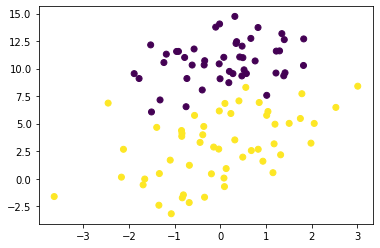

In [61]:
plt.scatter(y,X,c=z)

In [60]:
data = pd.read_csv('logistic_dat.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,1
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [66]:
data1 = data.dropna()#处理缺失值
data2 = pd.get_dummies(data1[['Gender']])#返回处理后数据
data2

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [69]:
data3 = data2.drop(['Gender_Female'],axis=1)
data3

,Gender_Male
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


In [73]:
data4 = pd.concat([data3,data1[['User ID','Age','EstimatedSalary','Purchased']]],axis=1)
data4

,Gender_Male,User ID,Age,EstimatedSalary,Purchased
0,1,15624510,19,19000,0
1,1,15810944,35,20000,1
2,0,15668575,26,43000,0
3,0,15603246,27,57000,0
4,1,15804002,19,76000,0
...,...,...,...,...,...
395,0,15691863,46,41000,1
396,1,15706071,51,23000,1
397,0,15654296,50,20000,1
398,1,15755018,36,33000,0


In [74]:
data4 = data4.drop(['User ID'],axis=1)
data4

,Gender_Male,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,1
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [84]:
X = data4.iloc[:,:-1]
y = data4.iloc[:,-1:]
X


,Gender_Male,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [81]:
from sklearn.model_selection import train_test_split#将矩阵随机划分为训练子集和测试子集
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.3)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((280, 3), (120, 3), (280, 1), (120, 1))

In [83]:
from sklearn.linear_model import LogisticRegression#调用sklearn中的线性回归
model = LogisticRegression(max_iter=100000,tol=0.00001,solver='liblinear').fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))#打分

0.8321428571428572
0.7916666666666666


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [85]:
model.predict([[1,19,19000]])

array([0], dtype=int64)